# RANDOM FOREST MODEL BUILD

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


## Load Train and Test Datasets

In [2]:
df_train = pd.read_csv('../2_Modeling-Phase/train_and_test_datasets/train_XGB.csv')
df_test = pd.read_csv('../2_Modeling-Phase/train_and_test_datasets/test_XGB.csv')

In [3]:
X_train = df_train.drop(['binary_attack'], axis=1)  # Features
y_train = df_train['binary_attack']  # Target variable

In [4]:
X_test = df_test.drop(['binary_attack'], axis=1)  # Features
y_test = df_test['binary_attack']  # Target variable

In [5]:
X_train, X_train_test, y_train, y_train_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Model Creation and Training

In [7]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,   # Seed for reproducibility
    n_jobs=-1          # Use all available CPU cores
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [8]:
# Save the trained model
model_folder = "../3_Post-Modeling-Phase/Models/"
model_filename = "NSL-KDD_RandomForest.joblib"
model_path = model_folder + model_filename


joblib.dump(rf_model, model_path)
print(f"Random Forest model saved to: {model_path}")

Random Forest model saved to: ../3_Post-Modeling-Phase/Models/NSL-KDD_RandomForest.joblib


In [9]:
# ## Evaluation on Validation Set
y_train_pred = rf_model.predict(X_train_test)

# Results

## With Training

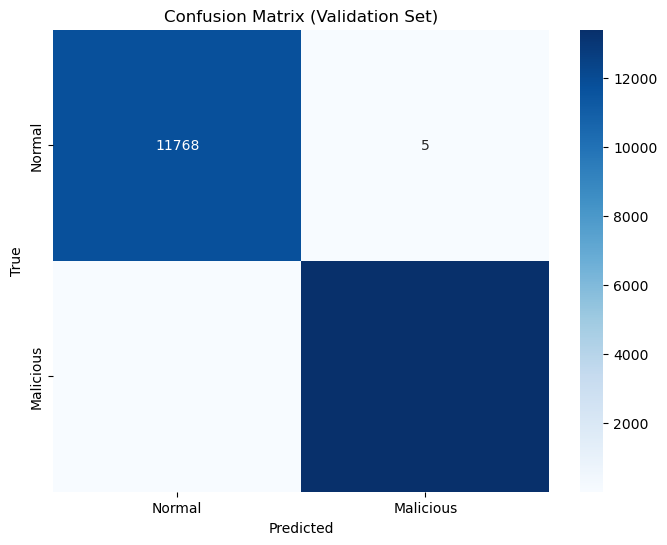

In [11]:
# Compute confusion matrix
cm = confusion_matrix(y_train_test, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Validation Set)')
plt.show()

In [12]:
# Validation Metrics
accuracy = accuracy_score(y_train_test, y_train_pred)
precision = precision_score(y_train_test, y_train_pred)
recall = recall_score(y_train_test, y_train_pred)
f1 = f1_score(y_train_test, y_train_pred)

print("Validation Metrics:")
print(f"Accuracy:   {accuracy:.2%}")
print(f"Precision:  {precision:.2%}")
print(f"Recall:     {recall:.2%}")
print(f"F1-score:   {f1:.2%}")

Validation Metrics:
Accuracy:   99.90%
Precision:  99.96%
Recall:     99.85%
F1-score:   99.91%


## With Test Data

In [13]:
# ## Evaluation on Test Dataset
y_test_pred = rf_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

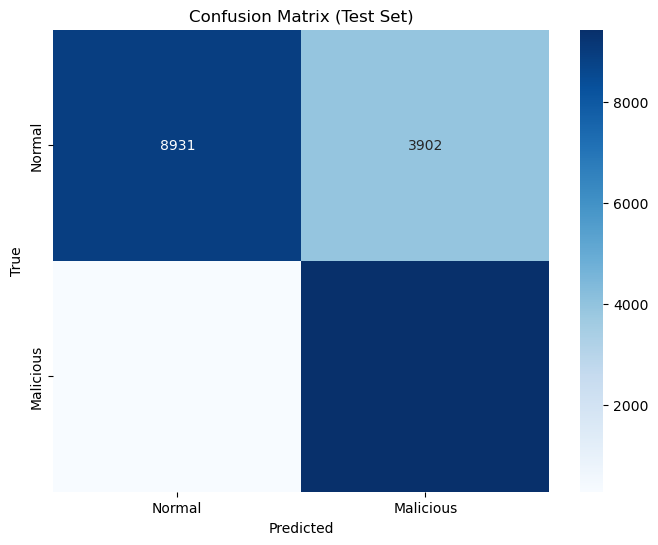

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Malicious'], 
            yticklabels=['Normal', 'Malicious'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [16]:
# Test Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print("Test Metrics:")
print(f"Accuracy:   {accuracy:.2%}")
print(f"Precision:  {precision:.2%}")
print(f"Recall:     {recall:.2%}")
print(f"F1-score:   {f1:.2%}")

Test Metrics:
Accuracy:   81.46%
Precision:  70.74%
Recall:     97.15%
F1-score:   81.87%


## HYPERPARAMETER TUNING

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [19]:
param_distributions = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None]
}

In [20]:
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [21]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


KeyboardInterrupt: 

## FINAL MODEL

In [22]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=500,  # Number of trees
    max_depth=10,      # Maximum depth of each tree
    random_state=42,   # Seed for reproducibility
    n_jobs=-1          # Use all available CPU cores
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=42)

# FEATURE IMPORTANCE

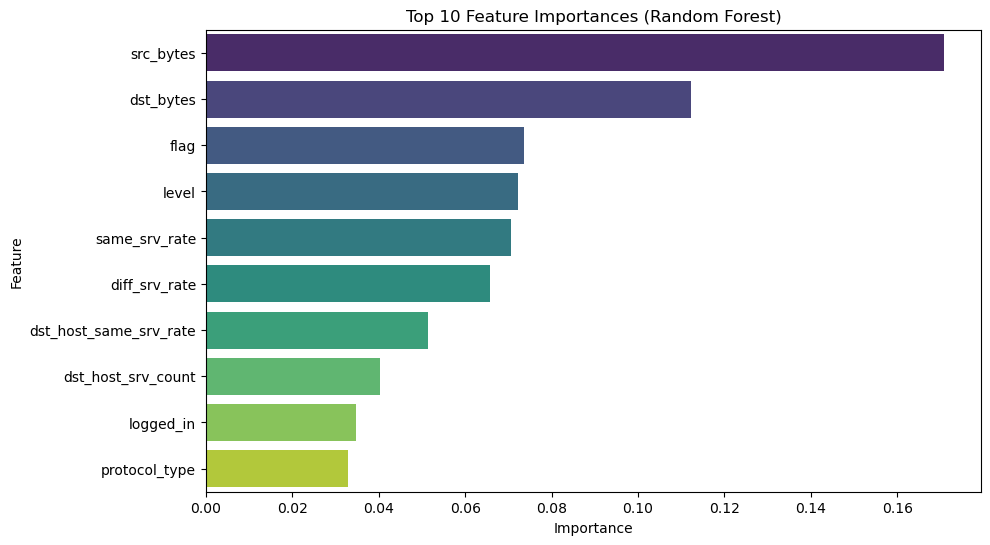

In [23]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

# EVALUATION

In [24]:
# ## Save Evaluation Metrics Function
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print("Test Set:")
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print()
    print("Train Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test Set:
[[8931 3902]
 [ 277 9434]]
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     12833
           1       0.71      0.97      0.82      9711

    accuracy                           0.81     22544
   macro avg       0.84      0.83      0.81     22544
weighted avg       0.86      0.81      0.81     22544


Train Set:
[[46853     4]
 [   52 53869]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46857
           1       1.00      1.00      1.00     53921

    accuracy                           1.00    100778
   macro avg       1.00      1.00      1.00    100778
weighted avg       1.00      1.00      1.00    100778

